In [35]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [36]:
hdb_data = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [37]:
hdb_data.head()

month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0            44.0        Improved                 1979  61 years 04 months   
1            67.0  New Generation                 1978  60 years 07 months   
2            67.0  New Generation                 1980  62 years 05 months   
3            68.0  New Generation                 1980   62 years 01 month   
4            67.0  New Generation                 1980  62 years 05 months   

   resale_price  
0      232000.0  
1      250000.0  
2      262000.0  
3      265000.0  
4      265000.0

In [38]:
#get coordinates and plot on map
#psf in each town

In [39]:
hdb_data.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [40]:
hdb_data['floor_area_sqft'] = hdb_data["floor_area_sqm"] * 10.764
hdb_data['resale_price_psf'] = hdb_data["resale_price"] / hdb_data["floor_area_sqft"] 

In [41]:
hdb_data.describe()

floor_area_sqm  lease_commence_date  resale_price  floor_area_sqft  \
count   198412.000000        198412.000000  1.984120e+05    198412.000000   
mean        96.990798          1996.205476  5.090481e+05      1044.008954   
std         24.024782            14.157232  1.781176e+05       258.602750   
min         31.000000          1966.000000  1.400000e+05       333.684000   
25%         82.000000          1985.000000  3.780000e+05       882.648000   
50%         93.000000          1996.000000  4.800000e+05      1001.052000   
75%        112.000000          2011.000000  6.100000e+05      1205.568000   
max        366.700000          2021.000000  1.600000e+06      3947.158800   

       resale_price_psf  
count     198412.000000  
mean         492.480422  
std          140.404077  
min          194.124140  
25%          393.824827  
50%          467.508181  
75%          555.026058  
max         1448.476203

In [ ]:
hdb_data.columns

In [ ]:
fig = px.scatter(hdb_data, 
                 x="month", 
                 y="resale_price_psf", 
                 color="town",
                 labels={"resale_price": "Resale Price", "floor_area_sqft": "Floor Area (sqft)"}) # Optional, for better axis labels

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))


# Show the plot
fig.show()


In [ ]:
fig = px.scatter(hdb_data, 
                 x="flat_type", 
                 y="resale_price_psf", 
                 color="town")

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))


# Show the plot
fig.show()


In [ ]:
hdb_data[hdb_data.remaining_lease > "80 years"]

In [ ]:
hdb_data[hdb_data.town == "SERANGOON"]

In [ ]:
hdb_data[hdb_data.remaining_lease > "97 years"]

### Function to bucket remaining lease column

In [ ]:
def remaining_lease_bucket(row):
    #Split the year out only 
    remaining_year = int(row.split()[0])
    
    for start in range(40,100,5):
        end = start + 5
        if start <  remaining_year <= end:
            return f"{start} to {end} years"

In [ ]:
hdb_data["remaining_year_bucket"] = hdb_data.remaining_lease.apply(remaining_lease_bucket)

In [ ]:
hdb_data

In [ ]:
fig = px.scatter(hdb_data, 
                 x="remaining_year_bucket", 
                 y="resale_price_psf", 
                 color="town")

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.update_xaxes(categoryorder='category descending')


# Show the plot
fig.show()


In [ ]:
hdb_data.describe()

In [ ]:
fig = px.box(hdb_data, 
                 x="remaining_year_bucket", 
                 y="resale_price_psf", 
                 color="town")

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.update_xaxes(categoryorder='category descending')
fig.update_layout(yaxis_range=[-100,1500])


# Show the plot
fig.show()


### Function for Resale Price Psf over time per town per street name (interactive)

> Box and whiskers plot/MinMax

In [ ]:
def resale_psf_over_time(town):

    unique_street_names = hdb_data[hdb_data.town == town].street_name.unique()
    unique_town_data = hdb_data[hdb_data.town == town]
    
    fig = px.box(unique_town_data, x='month', y='resale_price_psf', color='street_name')
    fig.update_layout(title_text=f"Resale Price over time of {town}")

    fig.show()

In [ ]:
# Loop over every town, takes time to load
for town in hdb_data.town.unique():
    resale_psf_over_time(town)

### Function for Resale Price PSF over flat_type, block, storey_range, flat_model, remaining_year_bucket, month (static)

In [ ]:
# flat_type, block, storey_range, flat_model, remaining_year_bucket, month

def multi_comparison_plots(town):

    # town = "SERANGOON"
    unique_town_data = hdb_data[hdb_data.town == town]
    unique_street_names = hdb_data[hdb_data.town == town].street_name.unique()

    selected_columns = ["flat_type", "block", "storey_range", "flat_model", "remaining_year_bucket", "month"]
    
    for u_street_name in unique_street_names:
        
        unique_street_data = unique_town_data[unique_town_data.street_name == u_street_name]
        
        fig, axs = plt.subplots(3, 2, figsize=(12,10))
        
        y = "resale_price_psf"
        
        for col, ax in zip(selected_columns, axs.ravel()):
                ax.set_title(f"{town}-{u_street_name}")
                ax.scatter(unique_street_data[col],unique_street_data["resale_price_psf"],s=5, alpha=0.5)
                ax.set_xlabel(col)
                ax.set_ylabel(y)
                ax.grid(True)
                ax.tick_params(axis="x", rotation=90, labelsize=5)
        
        plt.title("town")
        plt.tight_layout()  
        plt.show()

multi_comparison_plots('SERANGOON')

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def multi_comparison_plots(town):
    # Filter data for the selected town
    unique_town_data = hdb_data[hdb_data.town == town]
    unique_street_names = hdb_data[hdb_data.town == town].street_name.unique()

    selected_columns = ["flat_type", "block", "storey_range", "flat_model", "remaining_year_bucket", "month"]

    # Loop over each unique street name
    for u_street_name in unique_street_names:
        # Filter data for the current street
        unique_street_data = unique_town_data[unique_town_data.street_name == u_street_name]
        
        # Create a 3x2 grid for subplots
        fig = make_subplots(
            rows=3, cols=2, 
            shared_yaxes=True, 
            vertical_spacing=0.1, 
            subplot_titles=selected_columns
        )

        y = "resale_price_psf"

        # Loop over the selected columns and add scatter plots
        for i, col in enumerate(selected_columns):
            row = i // 2 + 1
            col_num = i % 2 + 1
            fig.add_trace(
                go.Scatter(
                    x=unique_street_data[col],
                    y=unique_street_data[y],
                    mode='markers',
                    marker=dict(size=5, opacity=0.5),
                ), row=row, col=col_num
            )

        # Update layout with titles and labels
        fig.update_layout(
            height=1200, 
            width=1000,
            title_text=f"{town} - {u_street_name}",
            showlegend=False,
            xaxis_tickangle=90,
        )

        # Show the plot
        fig.show()

# Call the function using TOWN (printed for reference)
print(hdb_data.town.unique())
multi_comparison_plots('SERANGOON')


### Median Prices in Each Town & Each Street (interactive)

In [42]:
def median_price_line(town):
    
    median_hdb_data = hdb_data.groupby(["town","street_name","month"])["resale_price_psf"].median().reset_index()
    
    town_median_hdb_data = median_hdb_data[median_hdb_data["town"]==town]
    
    fig = px.line(town_median_hdb_data, 
                  x="month", 
                  y="resale_price_psf", 
                  color="street_name",  
                  line_group="street_name",  
                  labels={'resale_price_psf': 'Median Resale Price PSF', 'month': 'Month'})
    
    # Customize the legend to display horizontally and adjust its position
    fig.update_layout(legend=dict(
        orientation="h",  
        yanchor="bottom", 
        y=1.02,  
        xanchor="right",  
        x=1 
    ))
    
    # Show the plot
    fig.show()

hdb_data.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

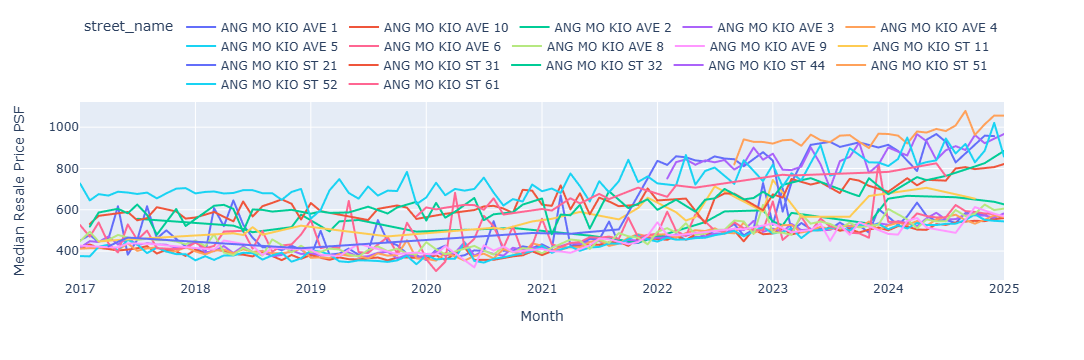

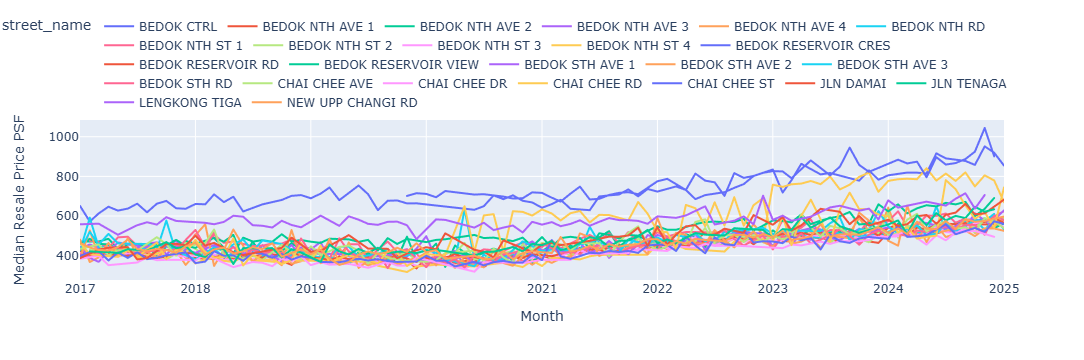

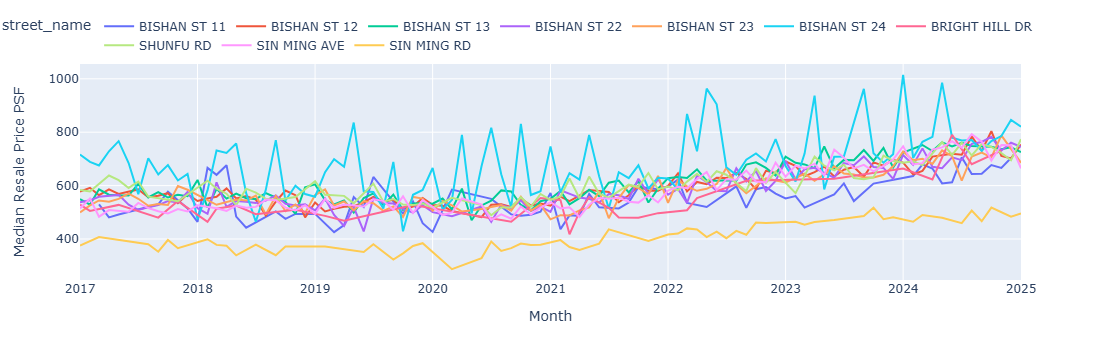

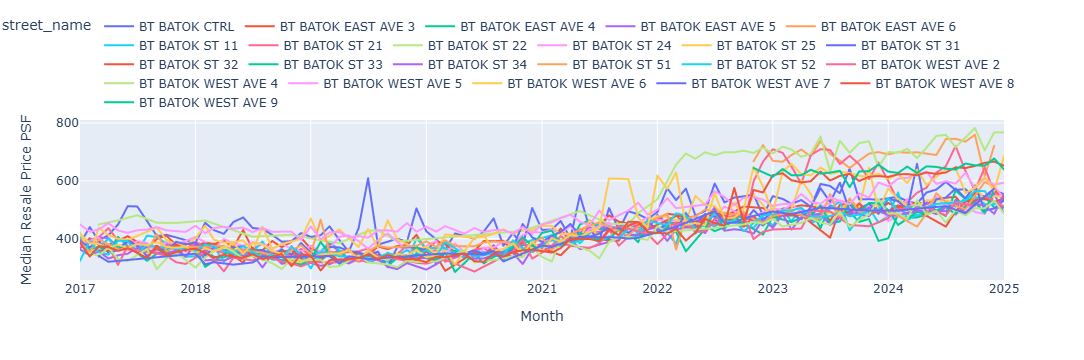

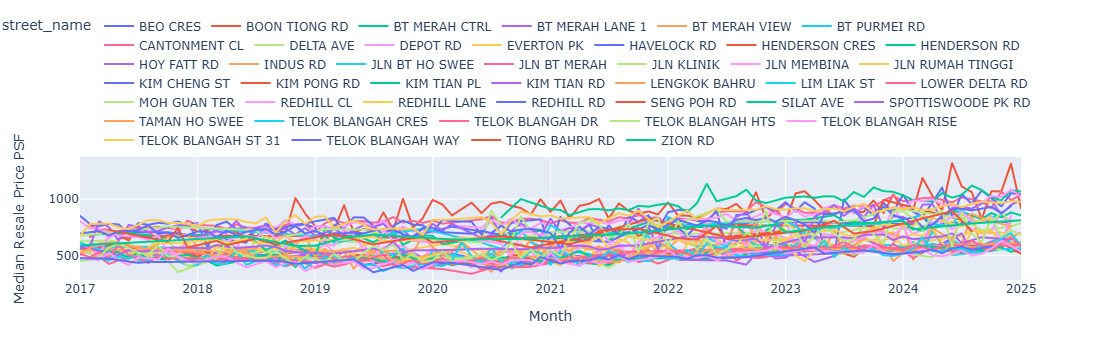

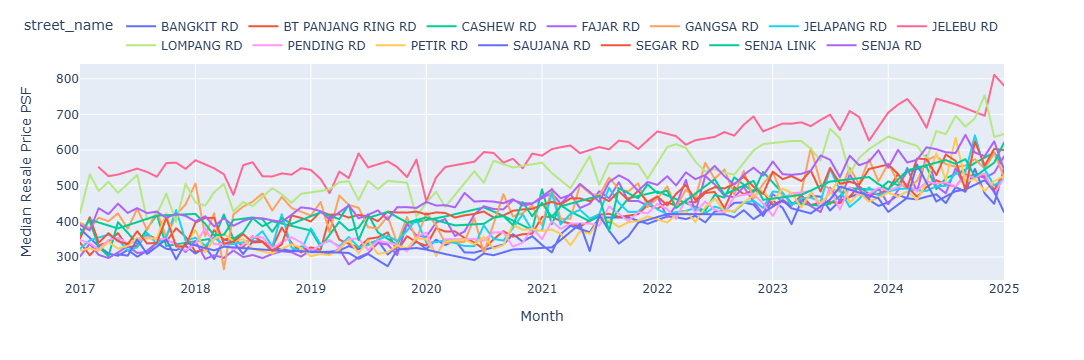

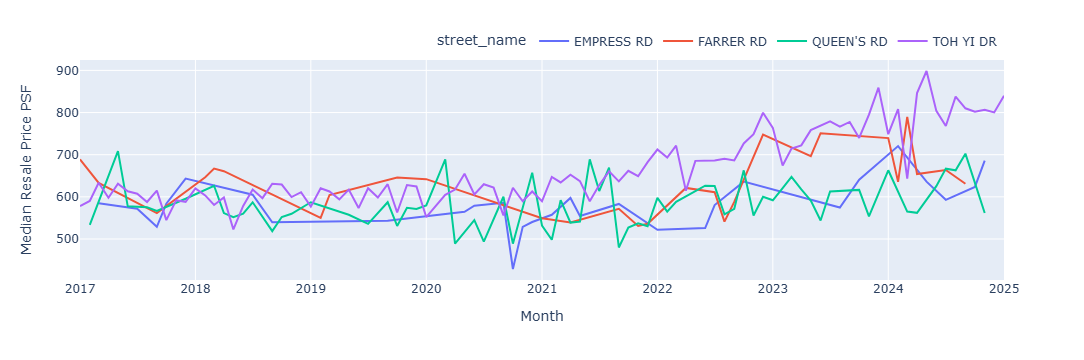

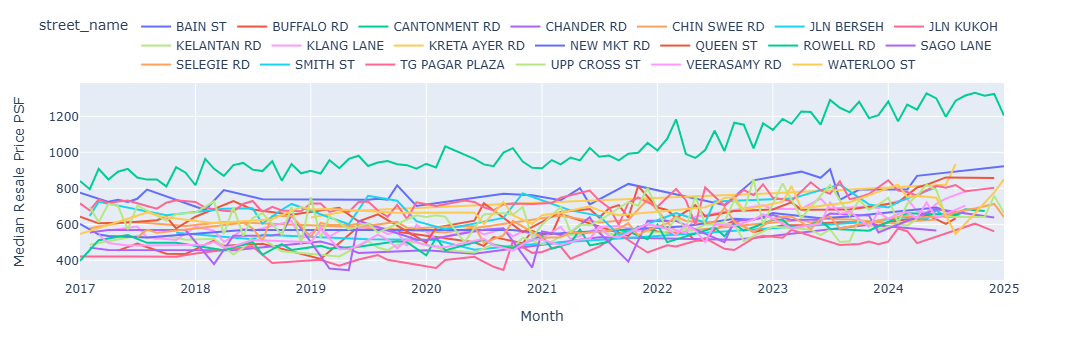

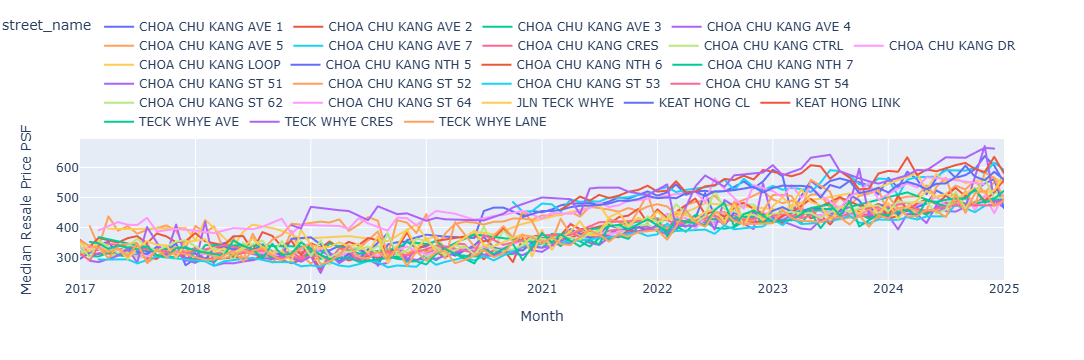

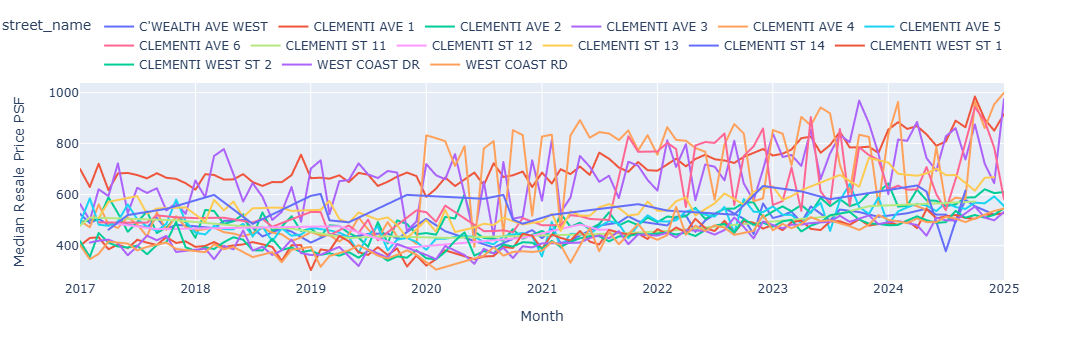

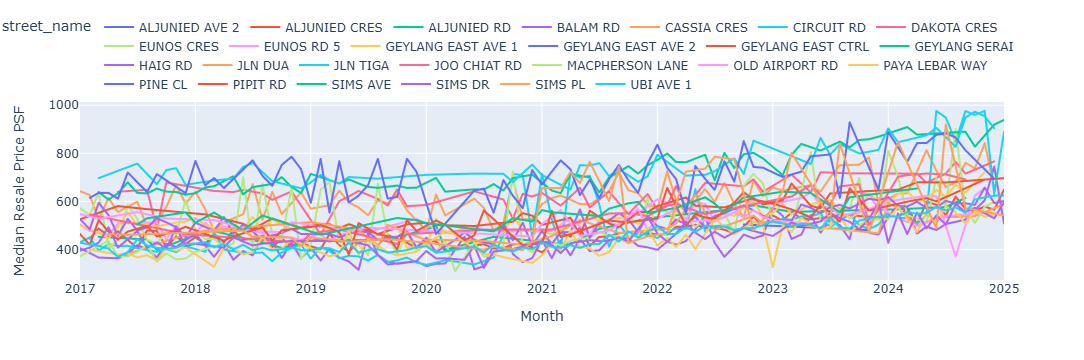

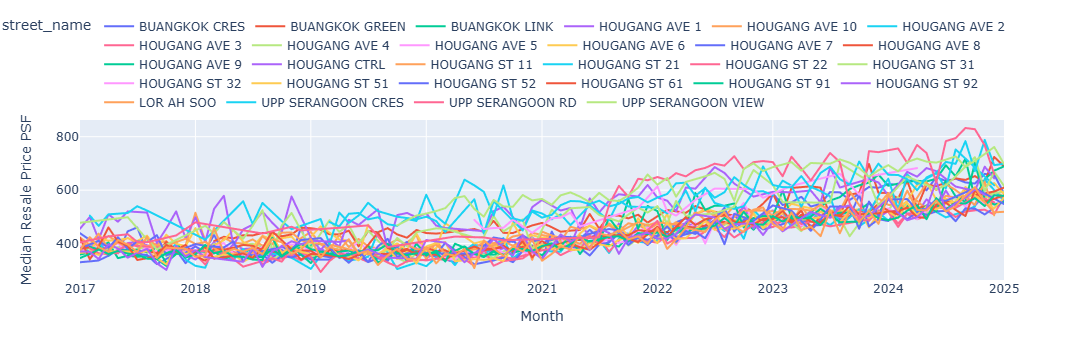

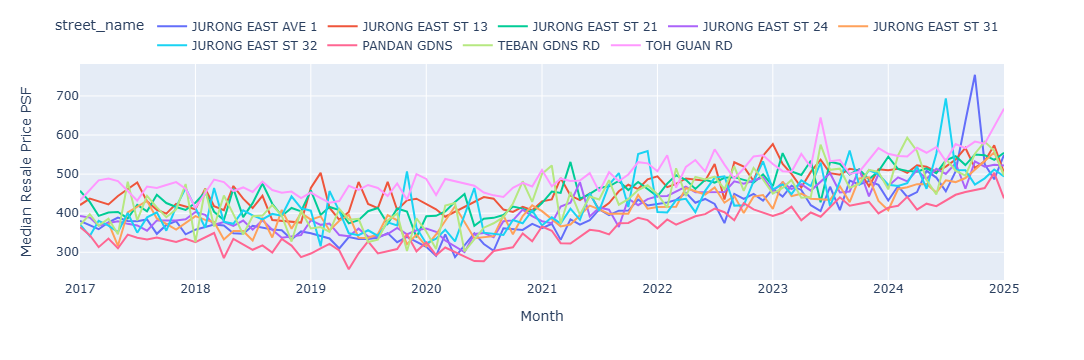

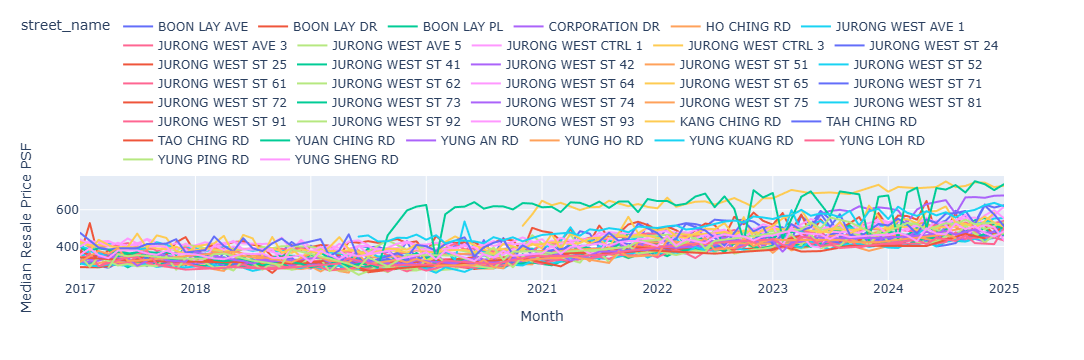

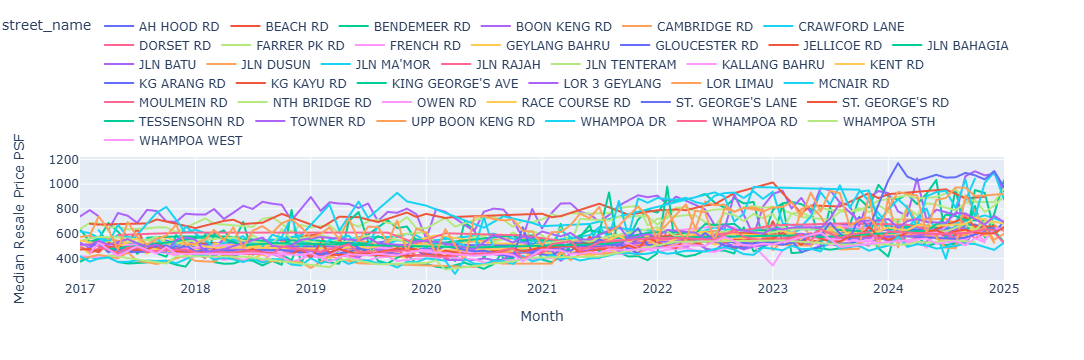

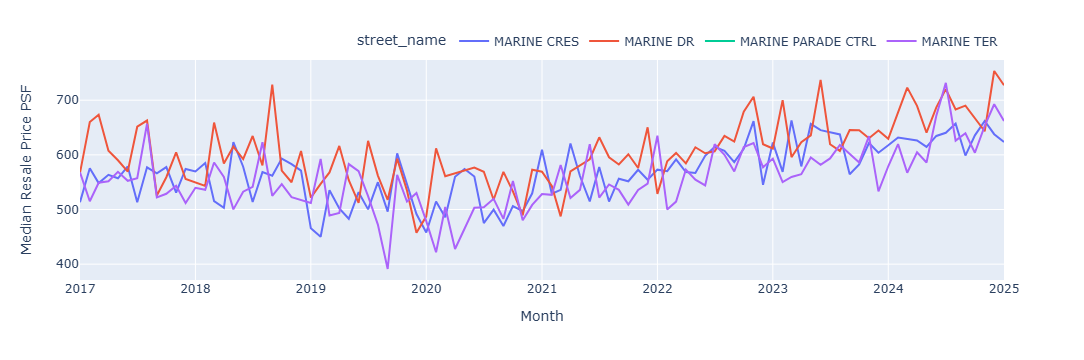

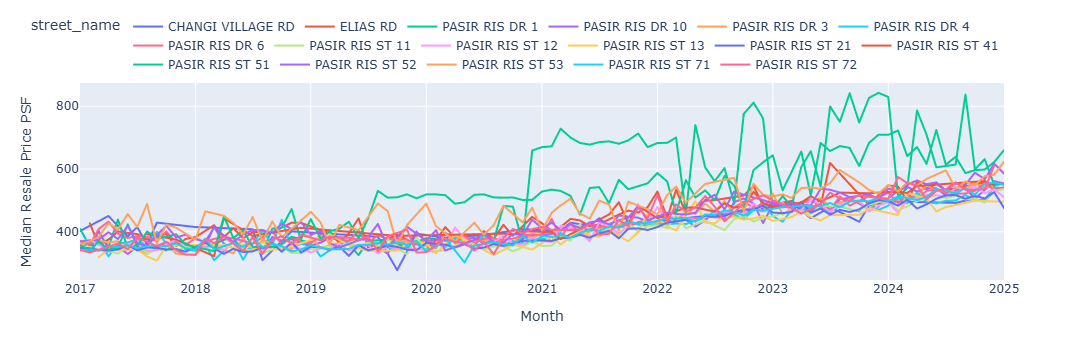

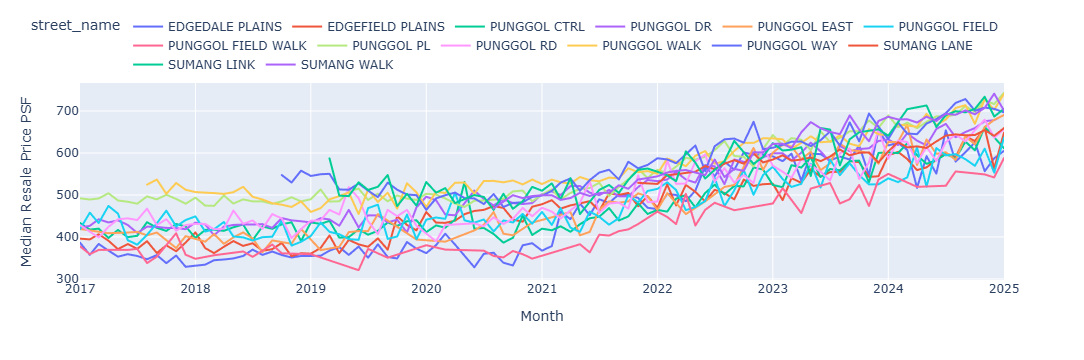

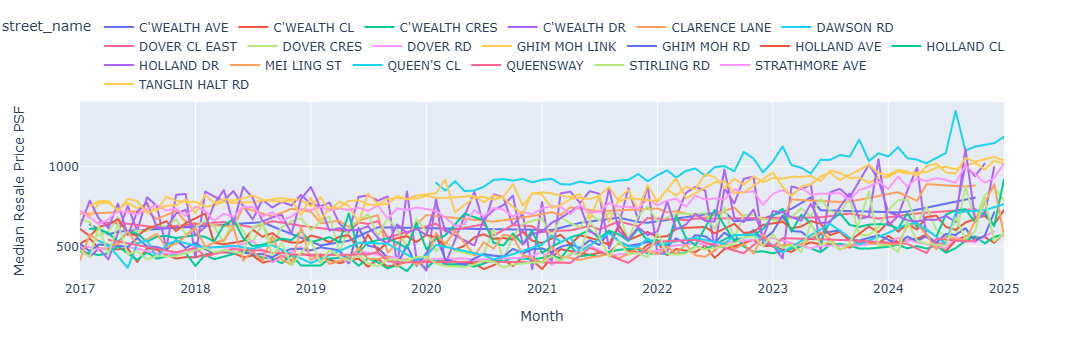

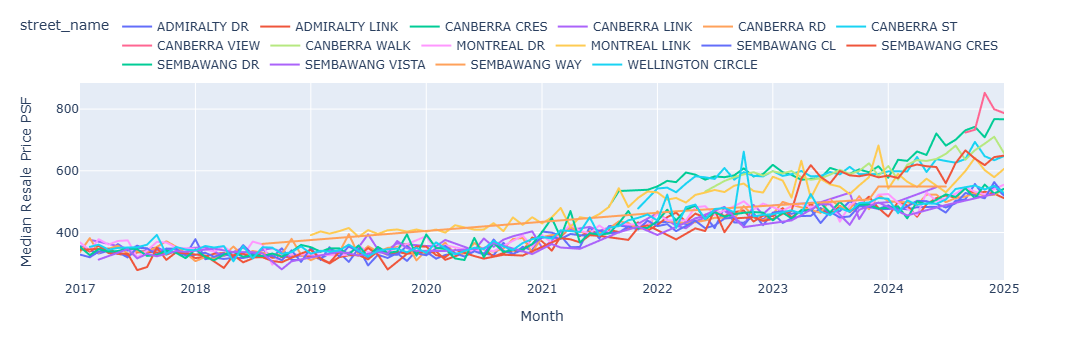

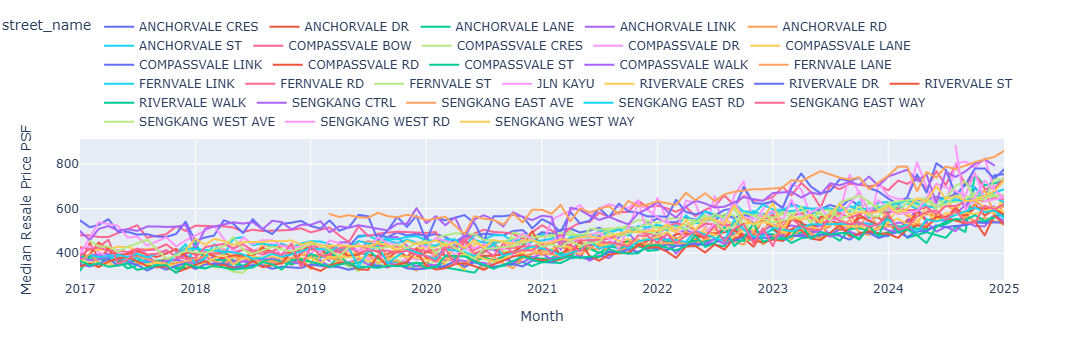

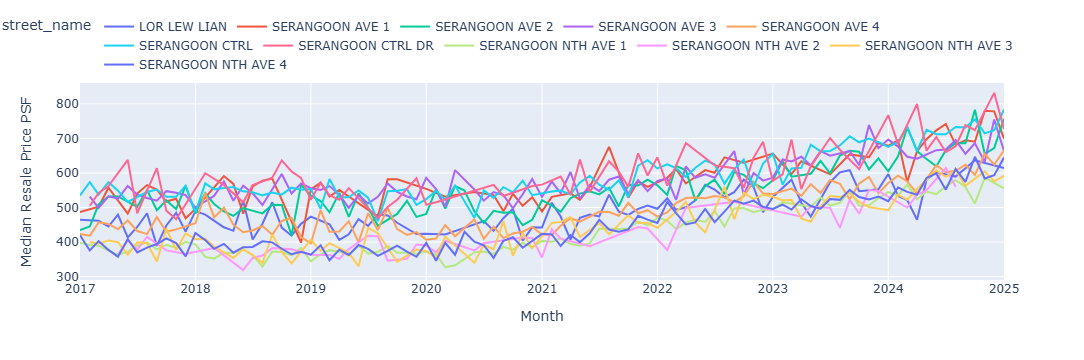

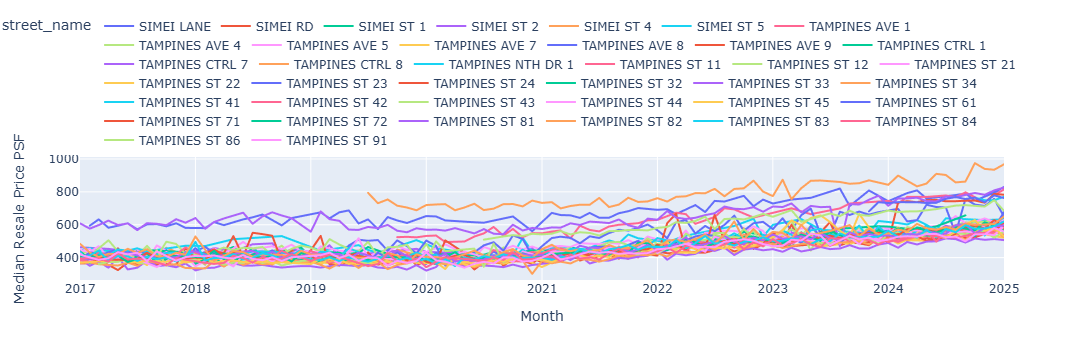

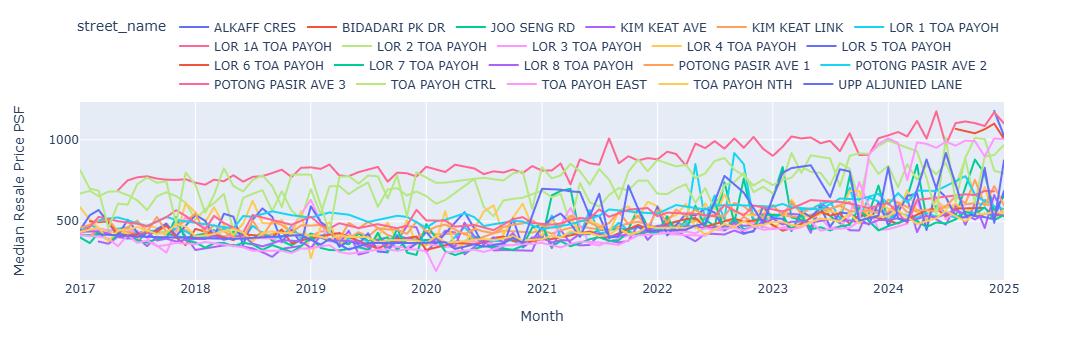

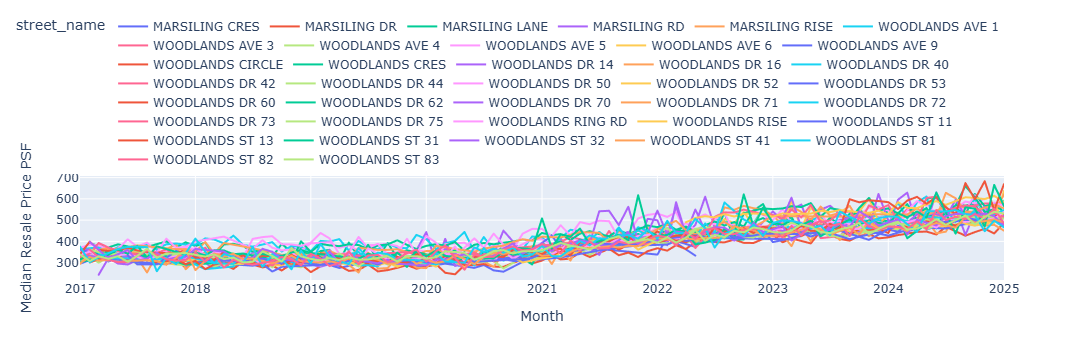

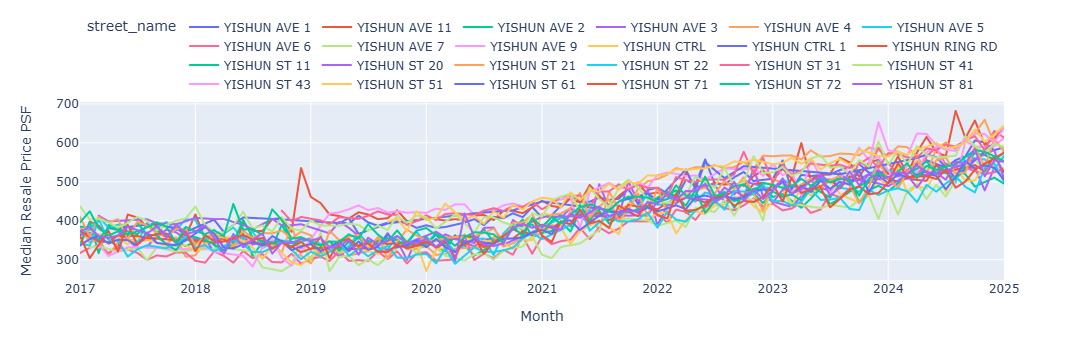

In [43]:
for town in hdb_data.town.unique():

    median_price_line(town)